In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('dmc.csv')
data = df.to_numpy()
#df
#df.to_numpy()[:,0]#prints kinetic energy
E_exact = -2.903724377034119598311159245194404

tau = data[:, 0]
step = data[:,1]
E_av = data[:, 2] [tau==0.0015]
E_errbar = data[:, 4]
E_for_average = E_av[int(0.25*len(E_av)):]
E_fin = np.mean(E_for_average)
E_errorbar = np.sqrt(np.var(E_for_average)/(len(E_for_average)/24))
#weightvar = data[:,5]
Emax = data[:,5]
Emin = data[:,6]
r12min = data[:,7]

In [23]:
df

,tau,step,elocal,elocalvar,eref,emax,emin,r12min
0,0.0100,0,-2.922820,0.177731,-2.900229,17.734459,-4.107500,0.021098
1,0.0100,1,-2.924751,0.160814,-2.900466,17.766136,-4.103117,0.026663
2,0.0100,2,-2.924004,0.172165,-2.900708,18.215864,-4.060118,0.017336
3,0.0100,3,-2.925676,0.159291,-2.900949,17.586728,-4.121616,0.034406
4,0.0100,4,-2.924738,0.178940,-2.901193,17.520646,-4.174076,0.028068
...,...,...,...,...,...,...,...,...
51995,0.0015,23995,-2.903638,0.344900,-2.903621,17.829846,-4.705989,0.002397
51996,0.0015,23996,-2.903511,0.343273,-2.903620,17.826821,-4.142907,0.012755
51997,0.0015,23997,-2.903815,0.339911,-2.903621,18.150099,-4.122545,0.011114
51998,0.0015,23998,-2.903535,0.344880,-2.903621,17.762888,-4.160885,0.005518


In [24]:
#E_f = E_av[tau ==0.01]
#np.savetxt('tau0.01',E_f)
step[tau==0.0015].shape

(24000,)

In [25]:
print('The obtained energy is: ', E_fin, '±', E_errorbar)

The obtained energy is:  -2.903736542994289 ± 2.569483696854311e-05


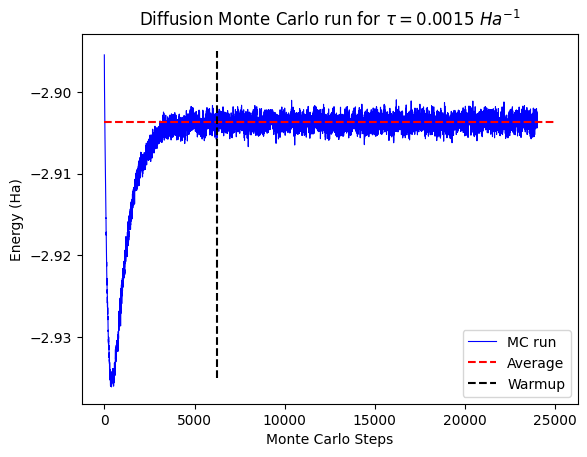

In [5]:
plt.plot(step[tau==0.0015], E_av, label='MC run',lw=0.8,c='b')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy (Ha)')
plt.title(r'Diffusion Monte Carlo run for $\tau = 0.0015\ Ha^{-1}$')
plt.plot([0,25000],[-2.903737, -2.903737], label = 'Average',c='r',linestyle = '--')
plt.plot([int(25000/4), int(25000/4)],[-2.935,-2.895], label = 'Warmup',c='k', linestyle = '--')
plt.legend()

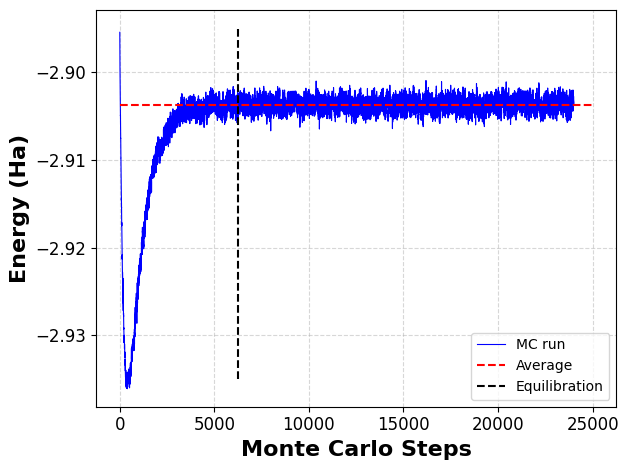

In [13]:
plt.plot(step[tau==0.0015], E_av, label='MC run',lw=0.8,c='b')
plt.plot([0,25000],[-2.903737, -2.903737], label = 'Average',c='r',linestyle = '--')
plt.plot([int(25000/4), int(25000/4)],[-2.935,-2.895], label = 'Equilibration',c='k', linestyle = '--')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)  # Adjust fontsize for x-axis
plt.yticks(fontsize=12)  # Adjust fontsize for y-axis
plt.ylabel('Energy (Ha)', fontsize=16, fontweight='bold')
plt.xlabel('Monte Carlo Steps', fontsize=16,fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
def autocorelation(data,max_lag = 200,allow_neg = False):
    """
    Compute autocorrelation of a given 1D array.

    Args:
        data (np.ndarray): Input data.
        max_lag (int, optional): Maximum lag to compute autocorrelation. Defaults to 200.
        allow_neg (bool, optional): Whether to allow negative autocorrelation values. Defaults to False.

    Returns:
        tuple: lags, correlation, tc = correlation_time
    """
    if max_lag < 1 or max_lag >= len(data):
        raise ValueError("Max lag must be between 1 and the length of data - 1")

    mc = int(max_lag)#ensure it is an integer
    var = np.var(data,ddof=1)
    center_data = data - np.mean(data)
    lags = np.arange(1, mc+1, 1, dtype=int)
    correlation = np.zeros(mc)
    for j in lags:
        to_av = center_data[:-j]*center_data[j:]
        correlation[j-1] = np.average(to_av)/var
    if not allow_neg:
        correlation[correlation<0] = 0
    tc = 1+2*np.sum(correlation)
    return lags, correlation, tc


l,c,t = autocorelation(E_av[int(0.25*len(E_av)):],300,0)#E_av[int(0.25*len(E_av)):]
print('Correlation length = ',t)
print('#of independent blocks = ',len(E_av)/t)

Correlation length =  23.480586068287906
#of independent blocks =  1022.1209952000984


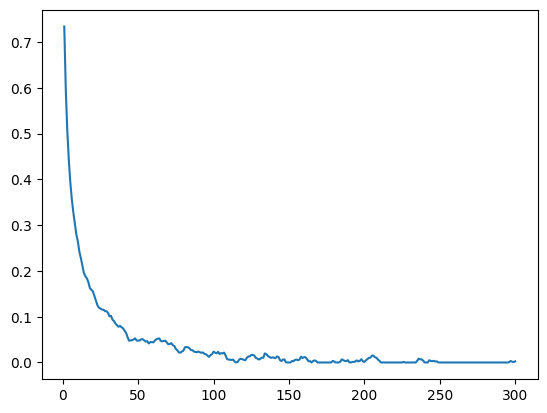

In [21]:
plt.plot(l,c)

Text(0, 0.5, 'Energy ')

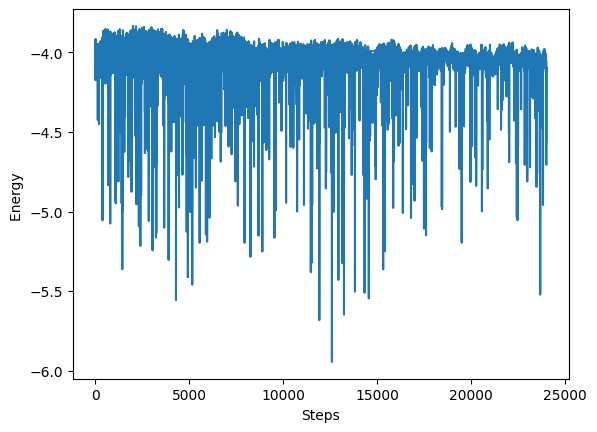

In [ ]:
plt.plot(step, Emin)
plt.xlabel('Steps')
plt.ylabel('Energy ')

Text(0, 0.5, 'Energy max')

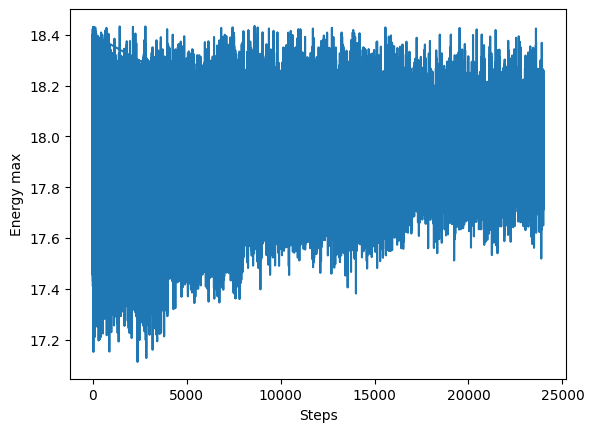

In [ ]:
plt.plot(step, Emax)
plt.xlabel('Steps')
plt.ylabel('Energy max')

Text(0, 0.5, 'r12min ')

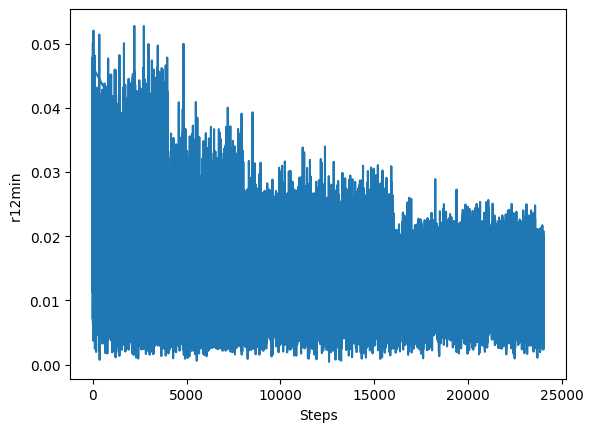

In [ ]:
plt.plot(step, r12min)
plt.xlabel('Steps')
plt.ylabel('r12min ')

In [ ]:
#E_fin = E_av[-1]
#E_errorbar = E_errbar[-1]
print('The obtained energy is: ', E_fin, '±', E_errorbar)

The obtained energy is:  -2.9048322329998166 ± 0.001076383562718236
